<a href="https://colab.research.google.com/github/annisaeka123/PCVK-_Semester-5/blob/main/week3/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PRAKTIKUM PERTEMUAN 3

Latihan Praktikum 1 - Operasi Citra Sederhana

In [93]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

Transformasi Linier Brightness

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


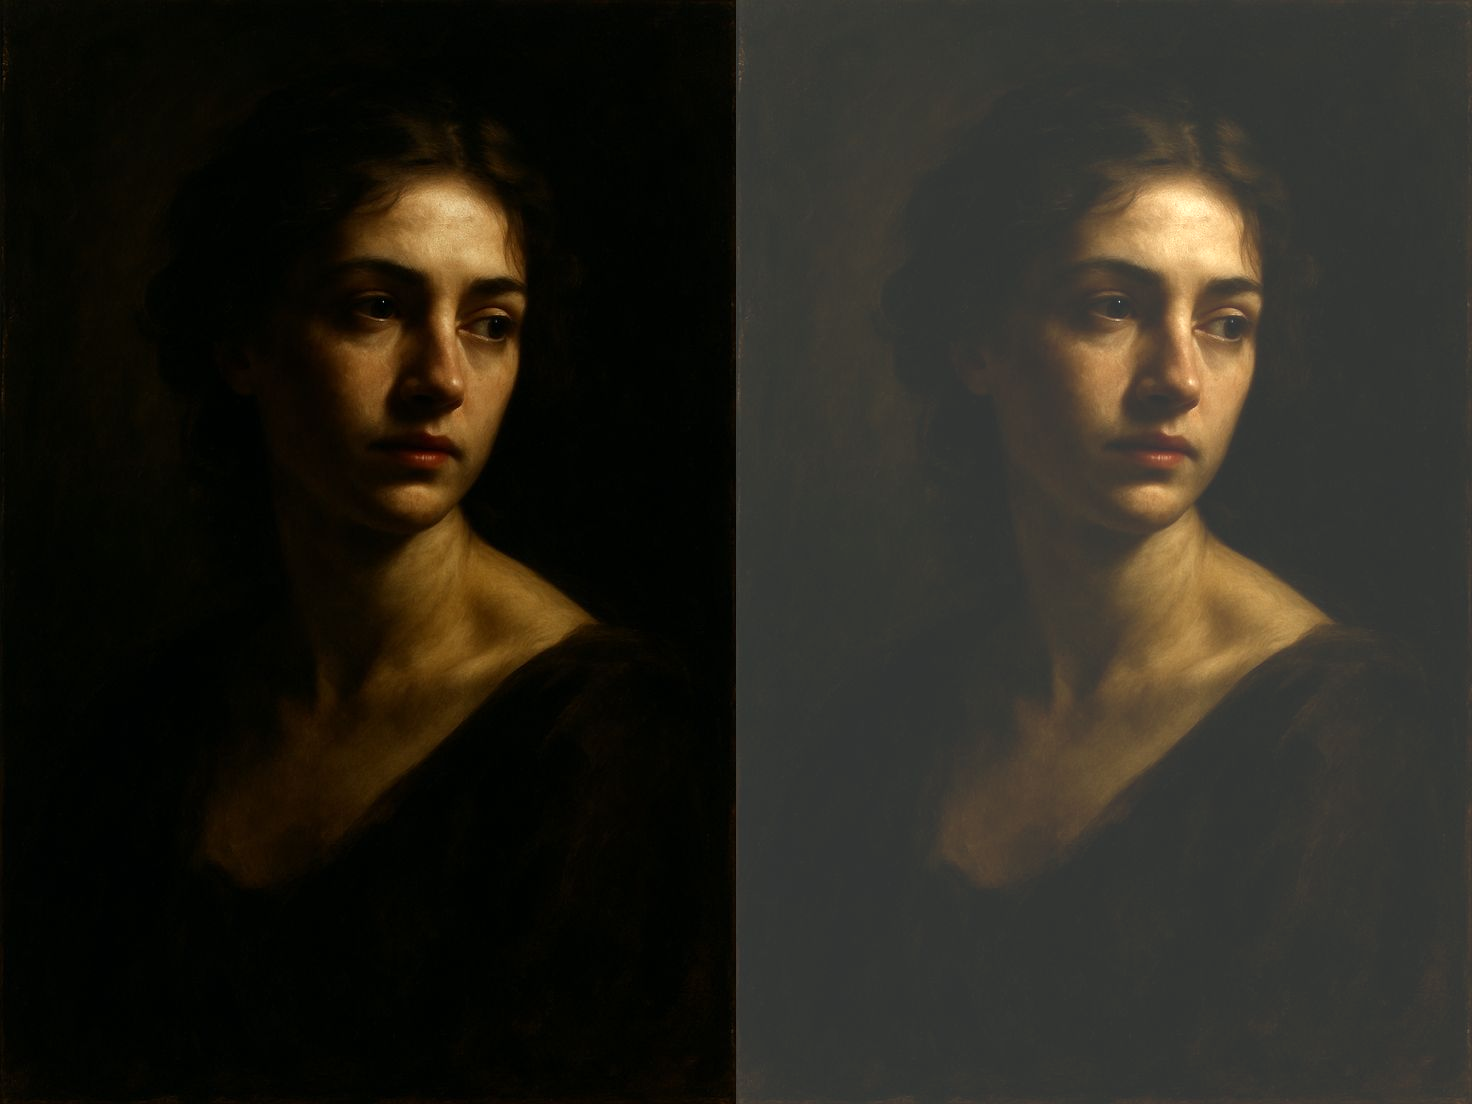

In [69]:
print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/img/female.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

# akses per piksel
# for y in range(original.shape[0]):
#     for x in range(original.shape[1]):
#         for c in range(original.shape[2]):
#           brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

# cara simple tanpa for loop
brightness_image = cv.convertScaleAbs(original, alpha=1, beta=brightness)

final_frame = cv.hconcat([original, brightness_image])
cv2_imshow(final_frame)

TUGAS PRAKTIKUM 1

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori

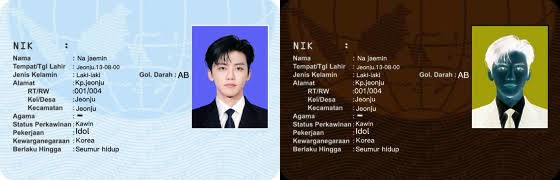

In [70]:
img = cv.imread('/content/drive/MyDrive/PCVK/img/ktp.jpeg')
inverse_img = 255 - img

final = cv.hconcat([img, inverse_img])
cv2_imshow(final)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras

 Mengubah kontras dan tingkat kecerahan citra 
----------------------------------------------
Masukkan tingkat kecerahan [-255..255]: 50
Masukkan kontras [1.0..3.0]: 2


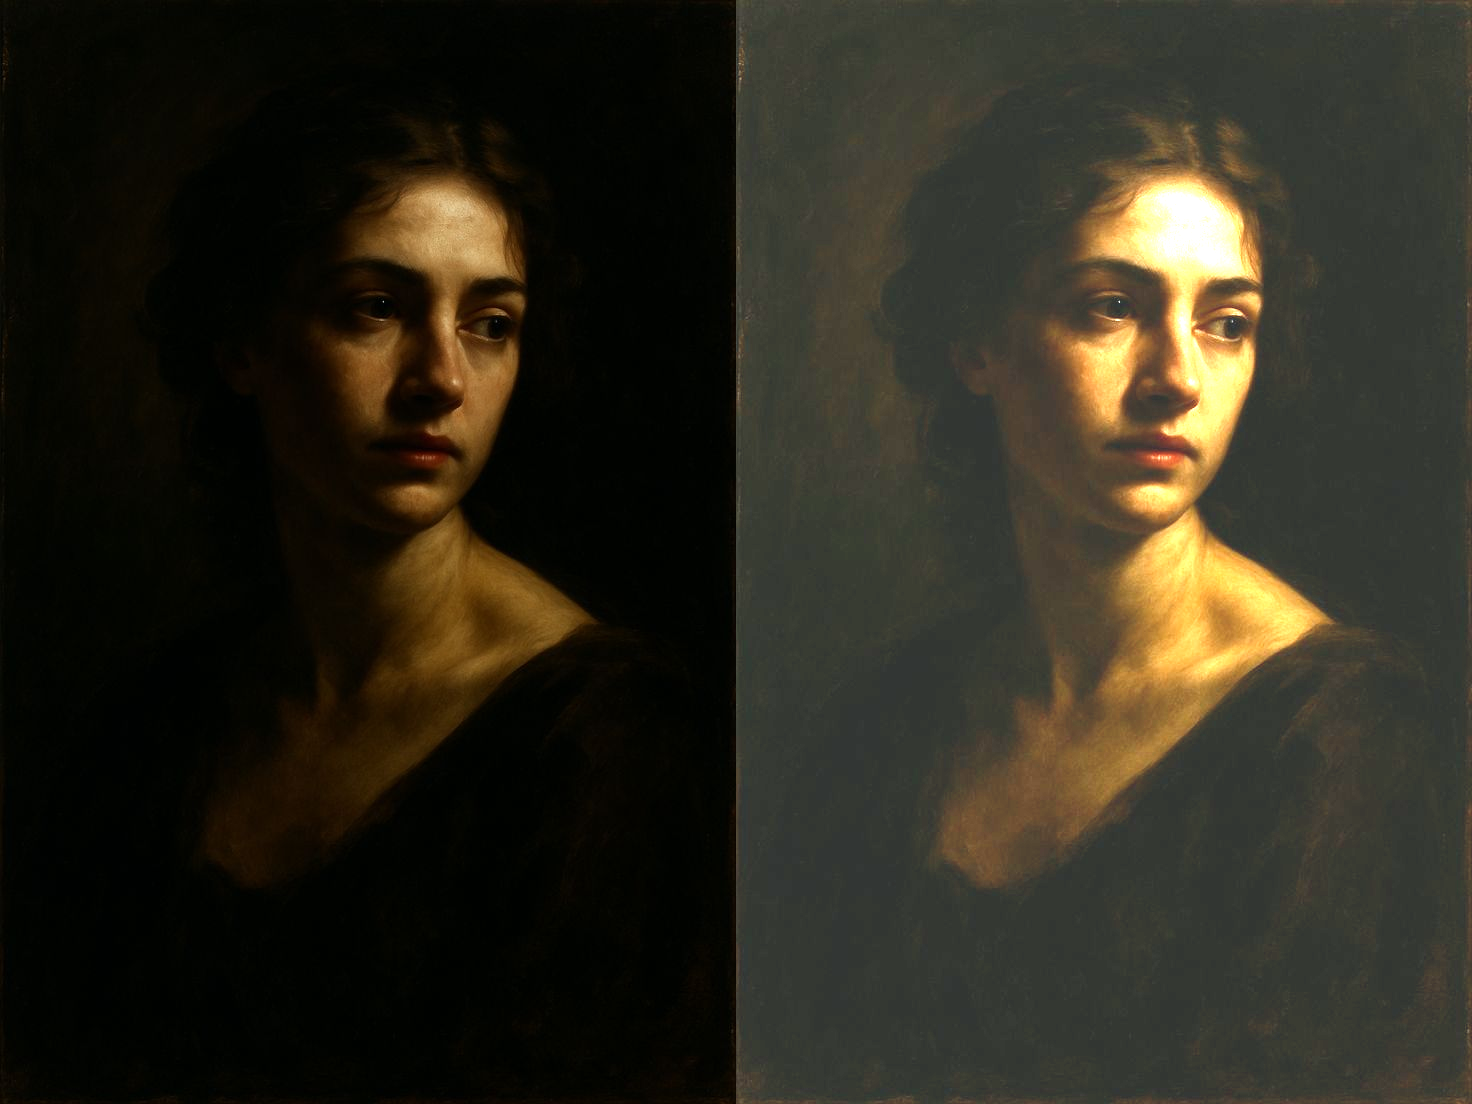

In [71]:
print(' Mengubah kontras dan tingkat kecerahan citra ')
print('----------------------------------------------')

brightness = int(input("Masukkan tingkat kecerahan [-255..255]: "))
contrast = float(input("Masukkan kontras [1.0..3.0]: "))

contrast_img = cv.convertScaleAbs(original, alpha=contrast, beta=brightness)

final = cv.hconcat([original, contrast_img])
cv2_imshow(final)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log

 Mengubah tingkat kecerahan citra dengan Transformasi Log 
----------------------------------
Masukkan nilai kecerahan: 50


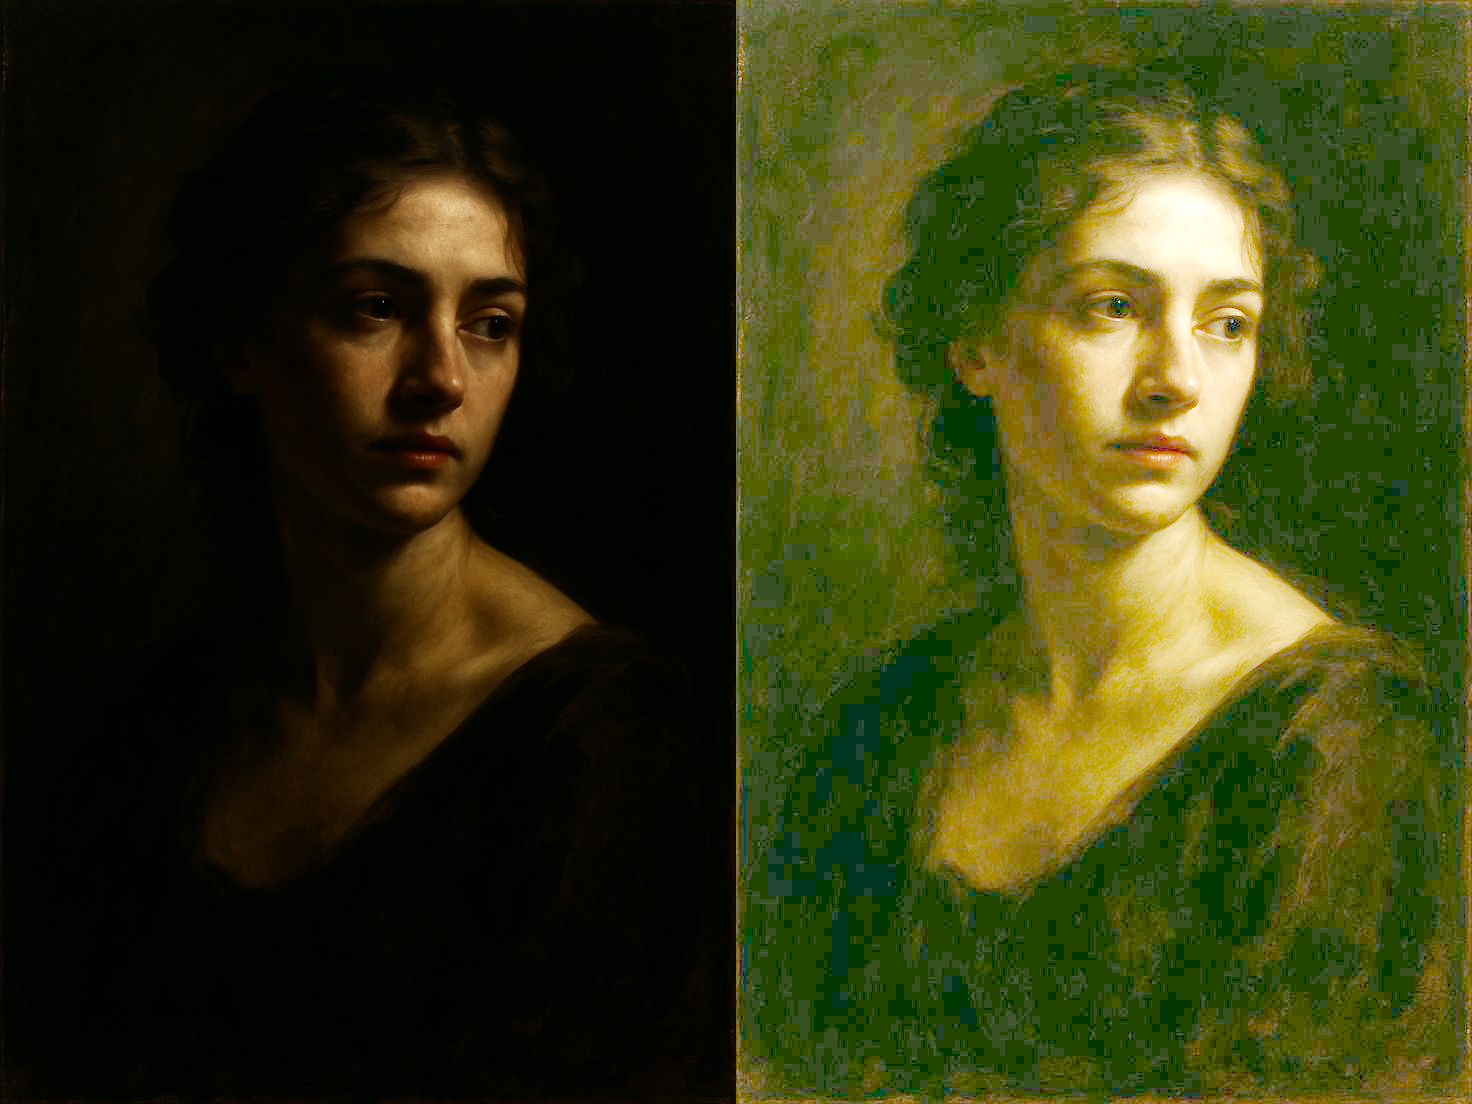

In [72]:
print(' Mengubah tingkat kecerahan citra dengan Transformasi Log ')
print('----------------------------------')

c = int(input("Masukkan nilai kecerahan: "))
log_img = c * (np.log1p(original.astype(np.float32)))
log_img = np.clip(log_img, 0, 255).astype(np.uint8)

final = cv.hconcat([original, log_img])
cv2_imshow(final)


4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori

a. Averaging

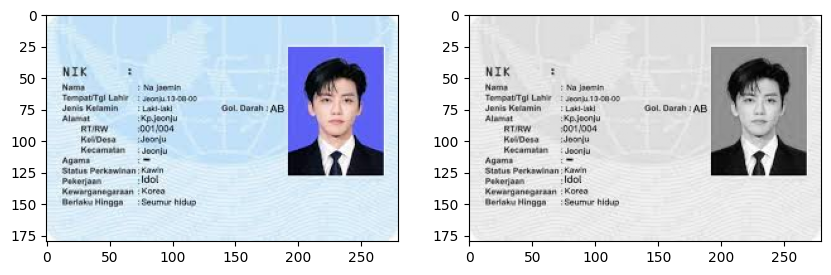

In [73]:
avg_gray = np.mean(img, axis=2).astype(np.uint8)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(img_rgb);
plt.subplot(1,2,2); plt.imshow(avg_gray, cmap='gray');
plt.show()

b. Lightness

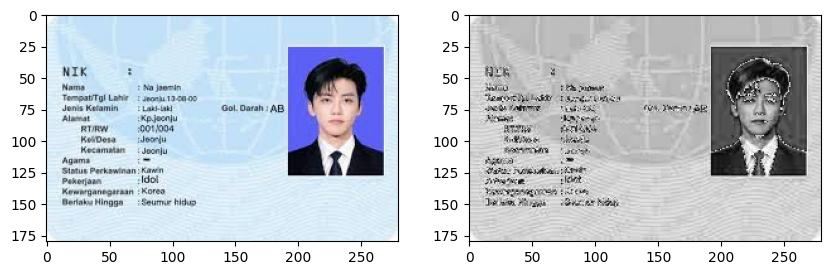

In [74]:
light_gray = ((np.max(img, axis=2) + np.min(img, axis=2)) / 2).astype(np.uint8)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(img_rgb);
plt.subplot(1,2,2); plt.imshow(light_gray, cmap='gray');
plt.show()

c. Luminance

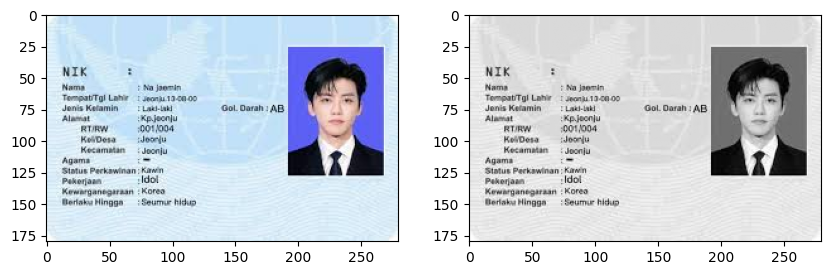

In [75]:
lum_gray = (0.299*img[:,:,2] + 0.587*img[:,:,1] + 0.114*img[:,:,0]).astype(np.uint8)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(img_rgb);
plt.subplot(1,2,2); plt.imshow(lum_gray, cmap='gray');
plt.show()


5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale

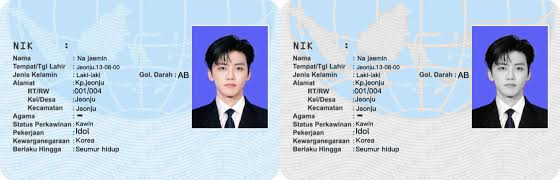

In [76]:
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# range warna biru
lower_blue = np.array([100, 50, 50])
upper_blue = np.array([140, 255, 255])
mask = cv.inRange(hsv, lower_blue, upper_blue)

# buat grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_bgr = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

# gabungkan
selective = np.where(mask[:,:,None].astype(bool), img, gray_bgr)

final = cv.hconcat([img, selective])
cv2_imshow(final)


Praktikum 2 - Operasi Aritmatika dan Logika

1. Buat Gamma Correction sesuai dengan petunjuk

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


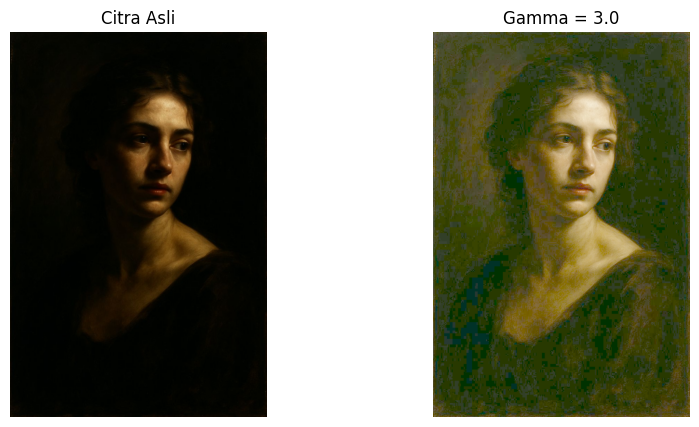

In [77]:
print(' Gamma Correction pada citra ')
print('----------------------------------')

try:
    gamma = float(input('Masukkan nilai Gamma: '))  # float biar fleksibel
except ValueError:
    print('Error, not a number')
    gamma = 1.0

# Baca gambar
img = cv.imread('/content/drive/MyDrive/PCVK/img/female.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Normalisasi ke [0,1], terapkan gamma correction dengan 1/gamma
gamma_corrected = np.array(255 * (img_rgb / 255.0) ** (1.0 / gamma), dtype=np.uint8)

# Tampilkan
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Citra Asli")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(gamma_corrected)
plt.title(f"Gamma = {gamma}")
plt.axis("off")

plt.show()

2. Buat Simulasi Image Depth

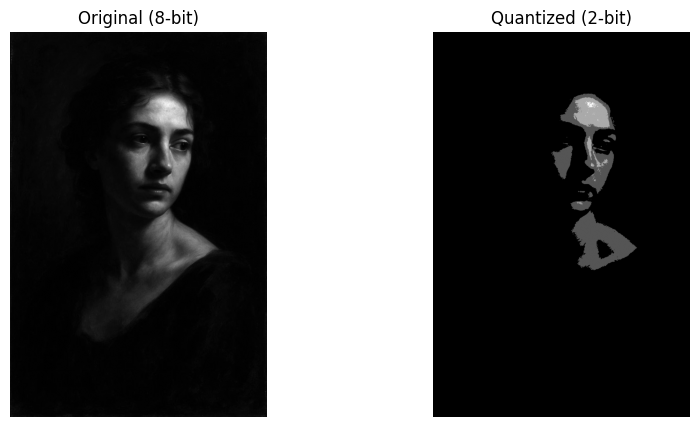

In [78]:
bit_depth = 2
levels = 2 ** bit_depth   # jumlah warna yang mungkin
step = 256 // levels      # jarak antar level

# Baca citra grayscale
original = cv.imread('/content/drive/MyDrive/PCVK/img/female.jpg', cv.IMREAD_GRAYSCALE)

if original is None:
    print("Citra tidak ditemukan, cek path filenya!")
else:
    # Lakukan kuantisasi (simulasi image depth)
    quantized = (original // step) * step

    # Tampilkan hasil
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title("Original (8-bit)")
    plt.imshow(original, cmap='gray')
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.title(f"Quantized ({bit_depth}-bit)")
    plt.imshow(quantized, cmap='gray')
    plt.axis("off")

    plt.show()

3. Buat modul Average Denoising

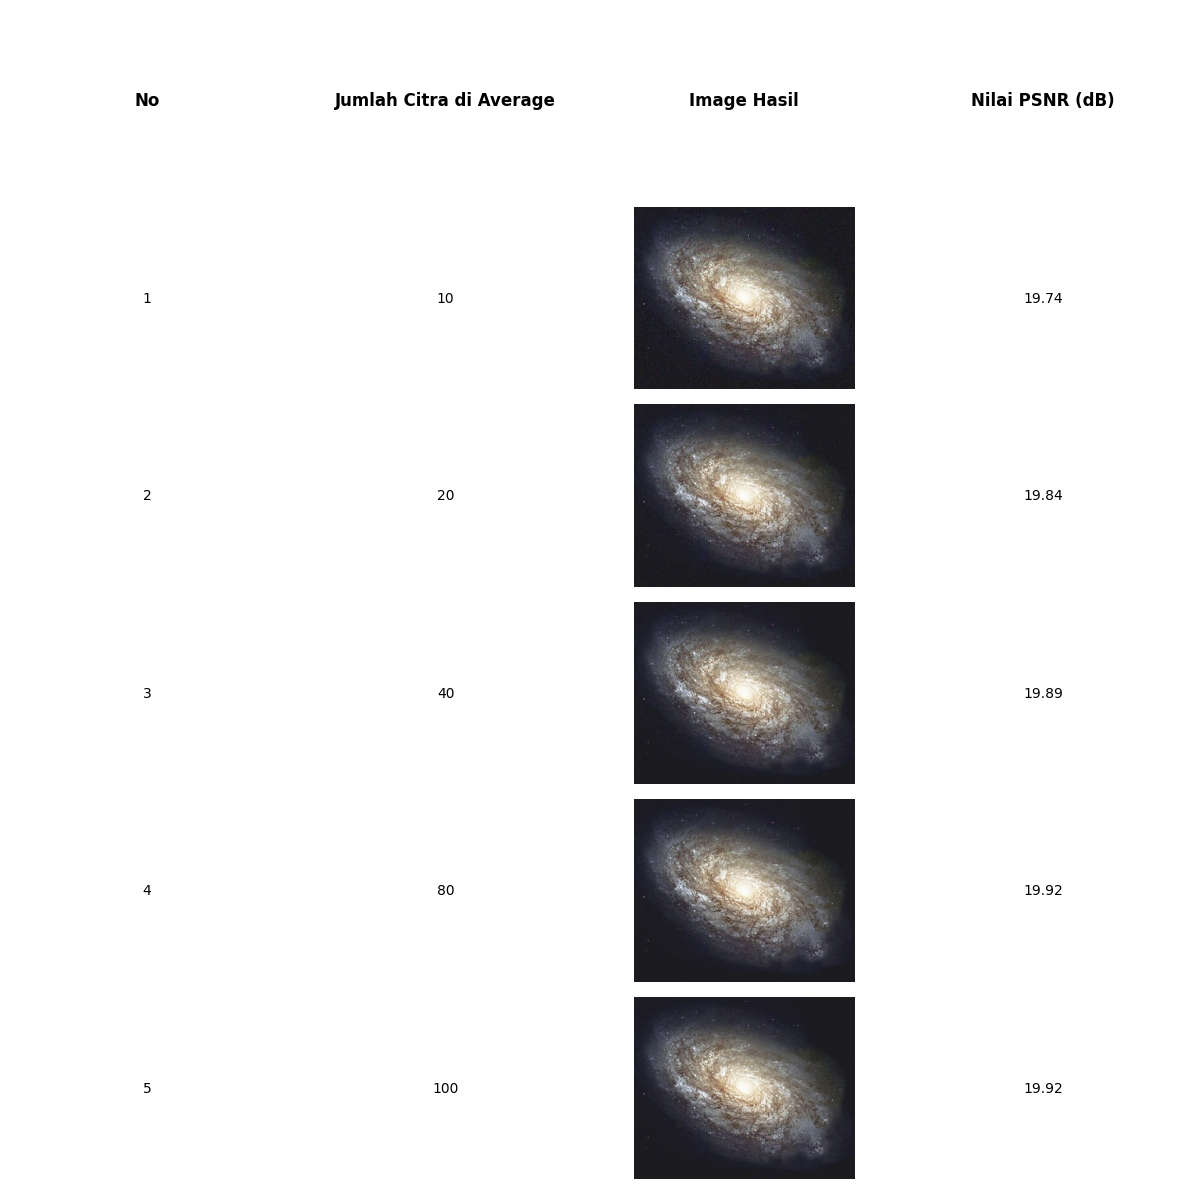

In [90]:
import glob
import pandas as pd

# --- 1. Baca citra asli ---
original = cv.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')

# --- 2. Baca semua citra noisy ---
cv_img = []
for img in sorted(glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg')):
    n = cv.imread(img)
    cv_img.append(n)

# --- 3. Fungsi average denoising ---
def average_denoising(images, N):
    avg_img = np.zeros_like(images[0], dtype=np.float32)
    for i in range(N):
        avg_img += images[i].astype(np.float32)
    avg_img /= N
    return avg_img.astype(np.uint8)

# --- 4. Fungsi PSNR ---
def psnr(img1, img2):
    mse = np.mean((img1.astype(np.float32) - img2.astype(np.float32)) ** 2)
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

# --- 5. Uji dengan jumlah citra berbeda ---
N_values = [10, 20, 40, 80, 100]
results = []

for idx, N in enumerate(N_values, start=1):
    denoised_img = average_denoising(cv_img, N)
    psnr_val = psnr(original, denoised_img)
    results.append((idx, N, denoised_img, psnr_val))

# --- 6. Buat tabel rapi dengan gambar di dalam sel ---
fig, ax = plt.subplots(len(results)+1, 4, figsize=(12, 12))

# Header tabel
headers = ["No", "Jumlah Citra di Average", "Image Hasil", "Nilai PSNR (dB)"]
for j, h in enumerate(headers):
    ax[0, j].axis('off')
    ax[0, j].text(0.5, 0.5, h, ha='center', va='center', fontsize=12, fontweight='bold')

# Isi tabel
for i, (idx, N, img, psnr_val) in enumerate(results):
    # Kolom 1 (No)
    ax[i+1, 0].axis('off')
    ax[i+1, 0].text(0.5, 0.5, str(idx), ha='center', va='center')

    # Kolom 2 (Jumlah Citra)
    ax[i+1, 1].axis('off')
    ax[i+1, 1].text(0.5, 0.5, str(N), ha='center', va='center')

    # Kolom 3 (gambar hasil)
    ax[i+1, 2].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    ax[i+1, 2].axis('off')

    # Kolom 4 (PSNR)
    ax[i+1, 3].axis('off')
    ax[i+1, 3].text(0.5, 0.5, f"{psnr_val:.2f}", ha='center', va='center')

plt.tight_layout()
plt.show()

Dari hasil PSNR yang anda catat pada tabel diatas, kesimpulan yang dapat diambil adalah:

Berdasarkan hasil perhitungan nilai PSNR pada berbagai jumlah citra yang digunakan dalam proses average denoising, terlihat bahwa nilai PSNR meningkat seiring dengan bertambahnya jumlah citra yang di-average. Hal ini menunjukkan bahwa semakin banyak citra yang digunakan, kualitas citra hasil denoising semakin baik karena noise dapat berkurang lebih optimal. Namun demikian, peningkatan nilai PSNR menjadi tidak signifikan setelah jumlah citra mencapai sekitar 40 buah, di mana penambahan jumlah citra hingga 80 atau 100 tidak lagi memberikan peningkatan yang berarti. Dengan demikian, dapat disimpulkan bahwa metode average denoising efektif dalam meningkatkan kualitas citra dengan menaikkan PSNR, tetapi terdapat titik jenuh di mana penambahan jumlah citra tidak lagi memberikan perbaikan kualitas yang signifikan.

4. Buat image masking

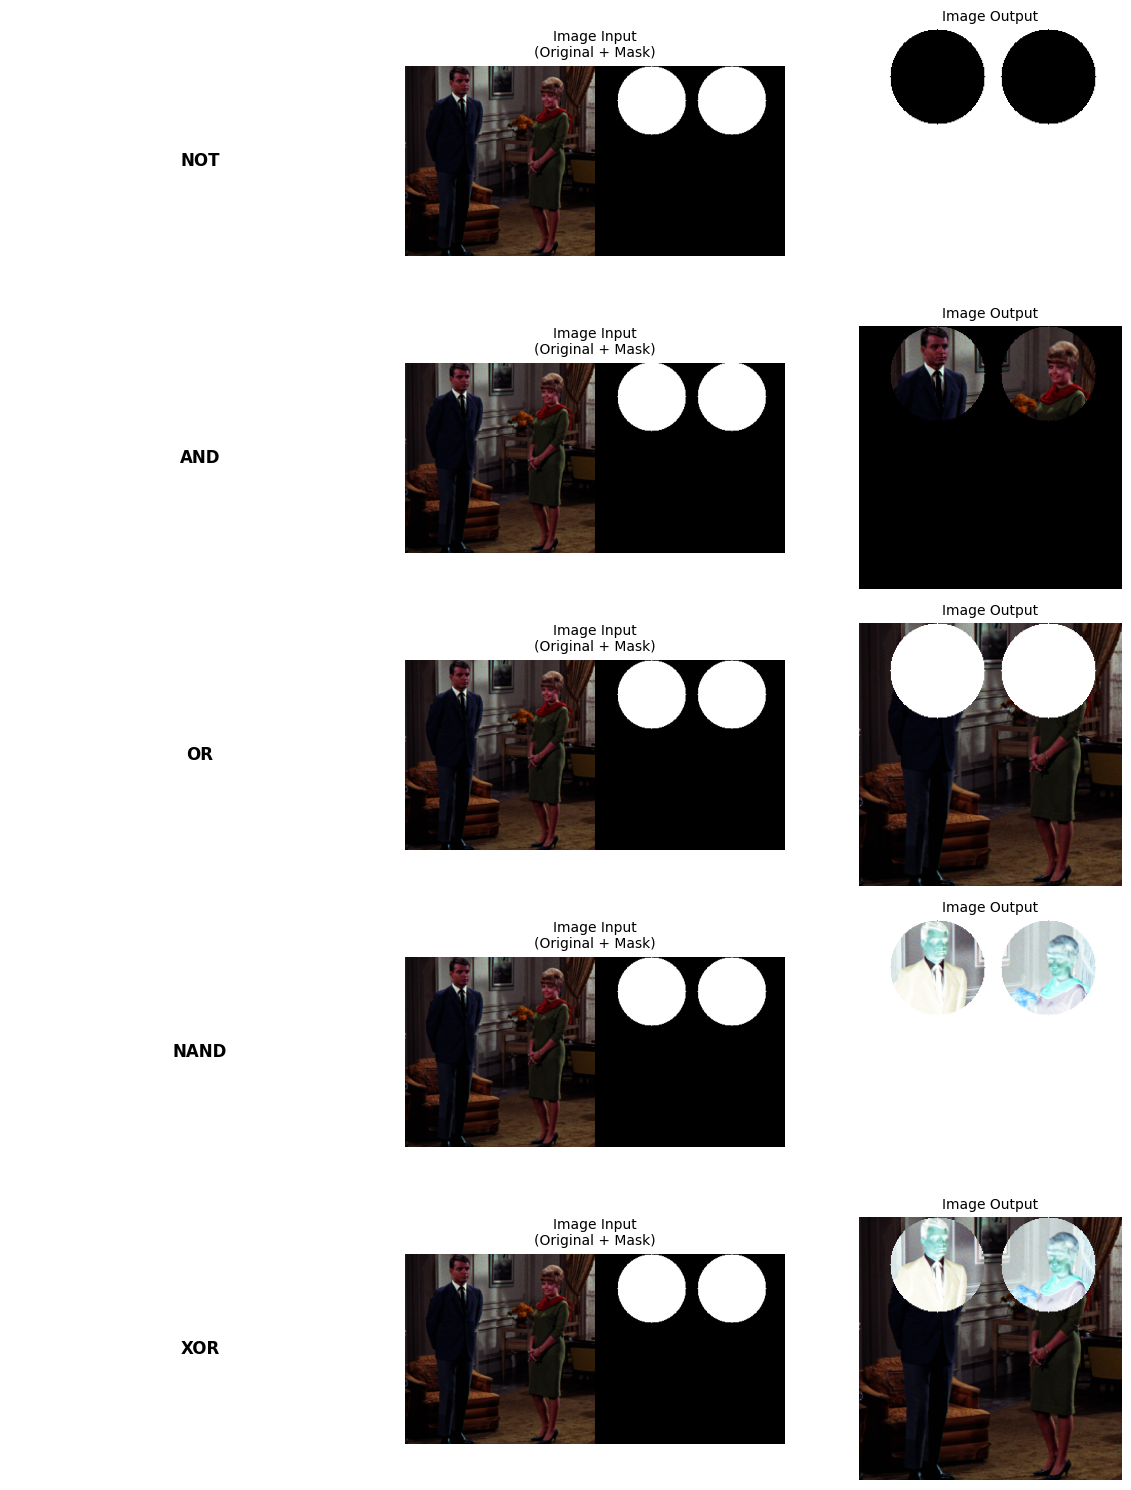

In [108]:
# ============ Pengaturan =================
image_path = '/content/drive/MyDrive/PCVK/Images/couple.jpg'  # ganti sesuai lokasi
save_path = 'mask_ops_results_aligned.png'  # file output (opsional)
# ==========================================

# Baca citra
img = cv.imread(image_path)
if img is None:
    raise FileNotFoundError(f"Image not found: {image_path}")

h, w = img.shape[:2]

# Buat mask
mask = np.zeros((h, w), dtype=np.uint8)
cv.circle(mask, center=(int(w*0.30), int(h*0.18)), radius=int(min(h,w)*0.18), color=255, thickness=-1)
cv.circle(mask, center=(int(w*0.72), int(h*0.18)), radius=int(min(h,w)*0.18), color=255, thickness=-1)
mask3 = cv.cvtColor(mask, cv.COLOR_GRAY2BGR)

# Operasi dasar
mask_not3   = cv.bitwise_not(mask3)
and_result  = cv.bitwise_and(img, img, mask=mask)
or_result   = cv.bitwise_or(img, mask3)
nand_result = cv.bitwise_not(and_result)
xor_result  = cv.bitwise_xor(img, mask3)

# Simpan hasil dalam list
operations = [
    ("NOT",   mask_not3),
    ("AND",   and_result),
    ("OR",    or_result),
    ("NAND",  nand_result),
    ("XOR",   xor_result)
]

# Tampilkan hasil dalam grid: kolom1=nama operator, kolom2=input, kolom3=output
nrows = len(operations)
plt.figure(figsize=(12, 3 * nrows))

for i, (op_name, output) in enumerate(operations):
    # kolom 1: judul operator
    ax = plt.subplot(nrows, 3, i*3+1)
    ax.axis("off")
    ax.text(0.5, 0.5, op_name, ha="center", va="center", fontsize=12, fontweight="bold")

    # kolom 2: input = original + mask (jejer)
    ax = plt.subplot(nrows, 3, i*3+2)
    combined_input = np.hstack((img, mask3))  # satukan kiri-kanan
    ax.imshow(cv.cvtColor(combined_input, cv.COLOR_BGR2RGB))
    ax.set_title("Image Input\n(Original + Mask)", fontsize=10)
    ax.axis("off")

    # kolom 3: output
    ax = plt.subplot(nrows, 3, i*3+3)
    ax.imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB))
    ax.set_title("Image Output", fontsize=10)
    ax.axis("off")

plt.tight_layout()
plt.savefig(save_path, bbox_inches="tight", dpi=200)
plt.show()

Analisa

- NOT: membalik mask sehingga memilih area kebalikan (berguna jika ingin memilih background, bukan objek).

- AND: digunakan untuk mengekstrak/memotong bagian citra sesuai mask (hasil: hanya isi mask yang terlihat; area lain hitam).

- OR: ketika OR dilakukan antara citra dan mask putih, area mask menjadi putih penuh — berguna untuk menandai atau menutup area.

- NAND: kebalikan dari AND — meng-inversi output AND (menghasilkan artefak negatif + background putih jika AND menghasilkan background hitam).

- XOR: menghasilkan perbedaan/negatif pada area mask (bagus untuk efek inversi selektif atau mendeteksi perbedaan).